In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
import IPython.display as ipd
import subprocess

In [21]:
video_path = r"C:\Users\sahil\OneDrive\Desktop\Sahil\Projects\IIT_ETHIOS\basic_vid_process\50_data\vid1.mp4"

In [23]:
ipd.display(ipd.Video(video_path, embed=True))
subprocess.run(['start', video_path], shell=True)

In [50]:
cap = cv2.VideoCapture(r"C:\Users\sahil\OneDrive\Desktop\Sahil\Projects\IIT_ETHIOS\basic_vid_process\50_data\vid1.mp4")
video_frame=cap.get(cv2.CAP_PROP_FRAME_COUNT)
video_frame

44.0

In [51]:
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
print(f"height {height} , width {width}")

height 1280.0 , width 720.0


In [52]:
fps = cap.get(cv2.CAP_PROP_FPS)
print(f"fps {fps:0.2f}")

fps 30.00


In [53]:
cap.release()

In [54]:
cap = cv2.VideoCapture(r"C:\Users\sahil\OneDrive\Desktop\Sahil\Projects\IIT_ETHIOS\basic_vid_process\50_data\vid1.mp4")
ret, img =cap.read()
print(f"returned {ret} and image shape {img.shape}")

returned True and image shape (1280, 720, 3)


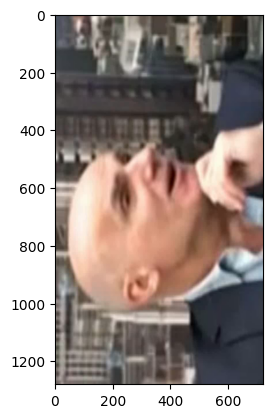

In [55]:
plt.imshow(img)

In [56]:
def display_img(img, figsize=(10,10)):
    img_= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax= plt.subplots(figsize=figsize)
    ax.imshow(img_)
    ax.axis('off')

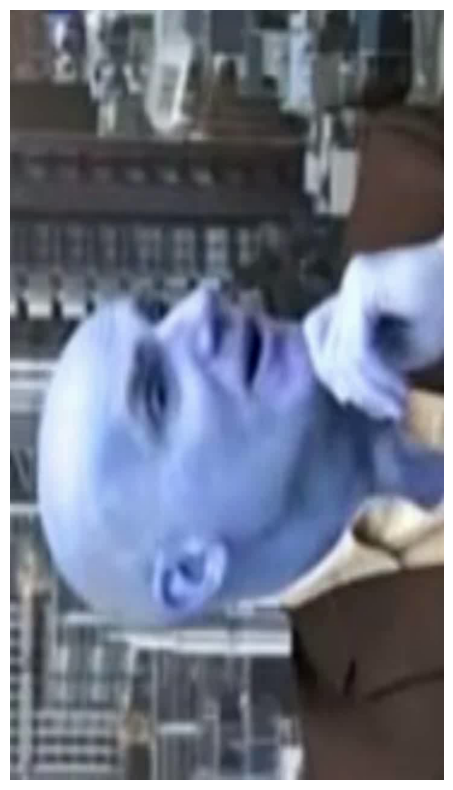

In [57]:
display_img(img)

In [32]:
cap.release()

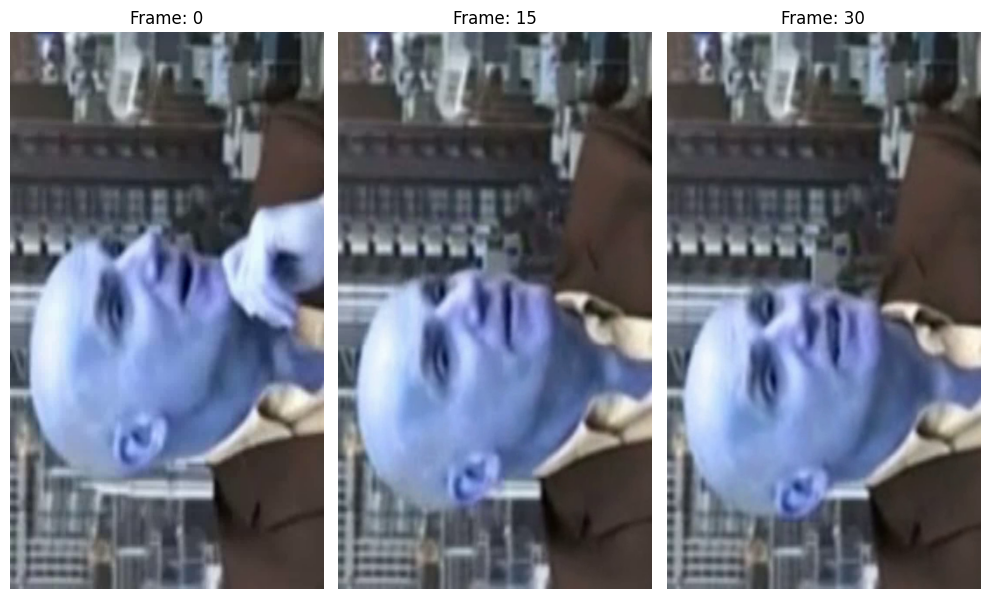

In [33]:
import cv2
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(10, 7))
axs = axs.flatten()  
cap = cv2.VideoCapture(r"C:\Users\sahil\OneDrive\Desktop\Sahil\Projects\IIT_ETHIOS\basic_vid_process\50_data\vid1.mp4")

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(n_frames):
    ret, img = cap.read()
    if not ret: 
        break


    if frame % 15 == 0:

        if img_idx < len(axs):
            axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
            axs[img_idx].set_title(f"Frame: {frame}")
            axs[img_idx].axis('off')  # Hide axis
            img_idx += 1
        else:
            break

plt.tight_layout()
plt.show()
cap.release()


In [46]:
#Annotations
labels= pd.read_csv(r"C:\Users\sahil\OneDrive\Desktop\Sahil\Projects\IIT_ETHIOS\basic_vid_process\50_data\youtube_faces_with_keypoints_full.csv")
labels.head()

vid_labels= (labels.query('video_id== "Connie_Chung_2"').reset_index(drop=True).copy())

vid_labels['image_height'].value_counts()

image_height
208    1
Name: count, dtype: int64

In [47]:
cap =cv2. VideoCapture(r"C:\Users\sahil\OneDrive\Desktop\Sahil\Projects\IIT_ETHIOS\basic_vid_process\50_data\vid1.mp4")
n_frames= int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx=0
for fame in range(n_frames):
    ret, img = cap.read()
    if ret==False:
        break
    if frame==22:
        break
cap.release()

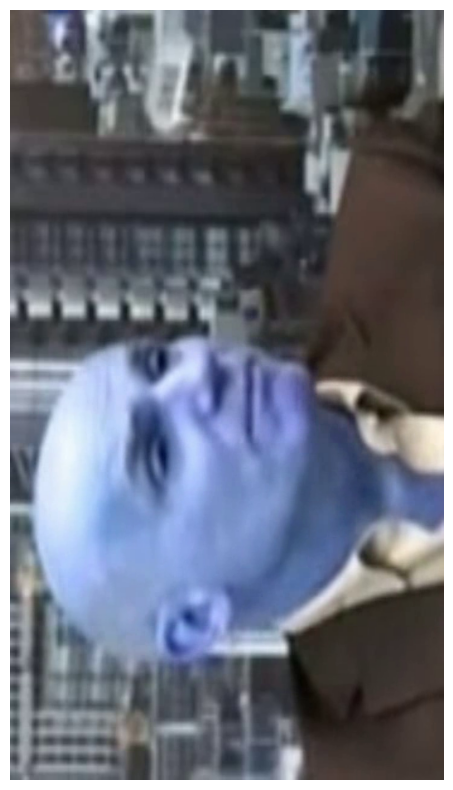

In [48]:
display_img(img)

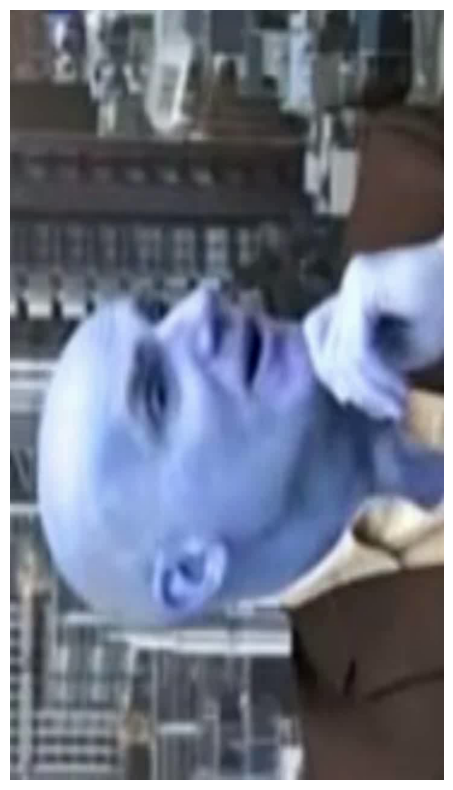

In [63]:
frame_labels = vid_labels.query('video_duration==100')
for i, d in frame_labels.iterrows():
    pt1 = int(d['box2d.x1']), int (d['box2d.y1'])
    pt2 = int(d['box2d.x2']), int (d['box2d.y2'])
    cv2.rectangle(img,pt1,pt2, (0,0,255),3)
display_img(img)

In [68]:
def add_anot(img, frame, vid_labels):
    max_frame = vid_labels.query('video_frame<=@frame')['video_frame'].max()
    frame_labels = vid_labels.query('video_frame == @max_frame')
    for i, d in frame_labels.iterrows():
        pt1 = int(d['box2d.x1']), int (d['box2d.y1'])
        pt2 = int(d['box2d.x2']), int (d['box2d.y2'])
        cv2.rectangle(img,pt1,pt2, (0,0,255),3)
    return img
cap.release()

In [75]:
VIDEO_CODEC = "MP4V"
fps = 30
width = 1280
height = 720
cap = cv2.VideoCapture('vid1.mp4') 
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

out = cv2.VideoWriter('out_test.mp4', cv2.VideoWriter_fourcc(*VIDEO_CODEC), fps, (width, height))

for frame in tqdm(range(n_frames), total=n_frames):
    ret, img = cap.read()
    if not ret:
        break
    img = add_anot(img, frame, video_labels)
    out.write(img)

out.release()
cap.release()


0it [00:00, ?it/s]
